# Copy the Notebook to your drive
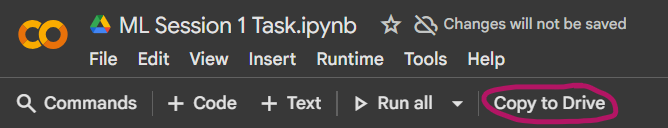

# Requirements
1. Implement a Polynomial Regression Model that the following data fit in
2. Initialize the Model
3. plot it and see to check if you model is good

# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

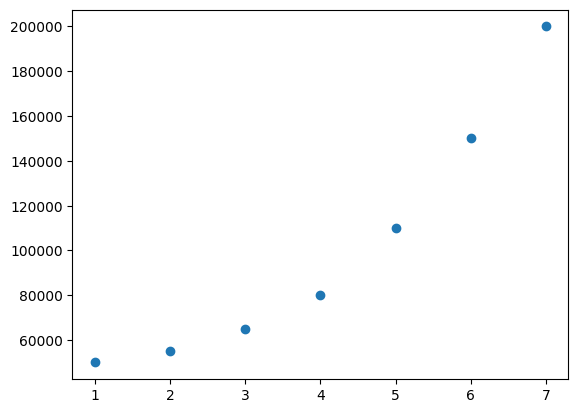

In [2]:
X = np.array([1, 2, 3, 4, 5, 6, 7], dtype=float)
y = np.array([50000, 55000, 65000, 80000, 110000, 150000, 200000], dtype=float)

plt.scatter(X,y)

It is obvious that the data can't fit in a linear model

# Model Implementation

In [3]:
# # the following is a prototype, so feel free to edit it
# class PolynomialRegression:
#   def fit(self):
#     pass
#   def predict(self):
#     pass

In [4]:
# Solution A
class LinearRegression:
    def fit(self, X, y ,alpha = 0.01 ,  n_iter=100 ):
        X,y, _ = self.reformat(X,y,None)
        
        # initalize weights
        n_features = (X.shape[1]+1)
        self.w = np.zeros(n_features)


        for i in range (n_iter):
            y_hat = self.predict(X)
            print( f"real value {y[0]}, predicted value = {y_hat[0]}, mse = { self.compute_cost(y,y_hat)}")
            self.w -= alpha * self.compute_gradient(X , y , y_hat)
                
    def compute_cost(self,y , y_hat):
        _, y, y_hat = self.reformat(None,y,y_hat)
        
        return sum((y-y_hat)**2)/(2 * len(y))
    
    def compute_gradient(self,X,y,y_hat):
        X , y , y_hat = self.reformat(X,y,y_hat)
        
        m = len(y)
        
        dj = np.zeros(len(self.w))

        n_features = X.shape[1]

        error = (y_hat-y)

        for i in range(n_features):
            dj[i] = np.dot(error , X[: ,i]) /m
        dj[-1] = sum(error)/m
        return dj

    def reformat(self, X = None,y = None,y_hat = None):
        X = np.array(X) 
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        y = np.array(y)
        y_hat = np.array(y_hat)
        return X ,y , y_hat


    def predict(self, X):
        #  X = (n x m) w = (m)
        X,*_ = self.reformat(X)
        return np.dot(X , self.w[:-1]) + self.w[-1]


In [5]:
# Solution B
class PolynomialRegression :
    def __init__(self,d):
        self.d = d
    def fit(self, X, y ,alpha = 0.01 ,  n_iter=100 ):
        X,y, _ = self.reformat(X,y,None)
        
        # initalize weights
        self.w = np.zeros(self.d)

        self.last_J = None
        self.last_w = None

        for i in range (n_iter):
            y_hat = self.predict(X)
            
            print( f"real value {y[0]}, predicted value = {y_hat[0]}, mse = {self.compute_cost(y , y_hat)}")

            self.w -= alpha * self.compute_gradient(X , y , y_hat)
                
        self.last_J = self.compute_cost(y , y_hat)
        self.last_w = self.w.copy()

    def compute_cost(self,y , y_hat):
        _, y, y_hat = self.reformat(None,y,y_hat)
        
        return sum((y-y_hat)**2)/(2 * len(y))
    
    def compute_gradient(self,X,y,y_hat):
        X , y , y_hat = self.reformat(X,y,y_hat)
        
        m = len(y)
        
        dj = np.zeros(self.d)

        error = (y_hat-y)

        for i in range(self.d):
            degree = (self.d-i-1)
            dj[i] = np.dot(error , X**degree) /m
        return dj

    def reformat(self, X = None,y = None,y_hat = None):
        X = np.array(X) 
        if X.ndim > 1:
            raise ValueError("X should be 1d vector")
        y = np.array(y)
        y_hat = np.array(y_hat)
        return X ,y , y_hat


    def predict(self, X):
        #  X = (n x m) w = (m)
        X,*_ = self.reformat(X)
        return np.poly1d(self.w)(X)


# Model Initialization

In [6]:
# # the following is a prototype, so feel free to edit it
# model = PolynomialRegression()

In [7]:
# Solution A
modelA = LinearRegression()

In [8]:
# Solution B
modelB = PolynomialRegression(d=4)

# Model Training

In [9]:
# # the following is a prototype, so feel free to edit it
# model.fit()

In [10]:
# Solution A
d = 4
X_columns = []
for i in range (1,d):
    X_columns.append(X**i)
X_A = np.column_stack(X_columns)
modelA.fit(X_A , y , alpha=0.00007 , n_iter=200)

real value 50000.0, predicted value = 0.0, mse = 6482142857.142858
real value 50000.0, predicted value = 1464.3499999999997, mse = 5330905694.924283
real value 50000.0, predicted value = 179.3024610000004, mse = 4408494213.836804
real value 50000.0, predicted value = 1354.8736504451497, mse = 3669370030.939728
real value 50000.0, predicted value = 328.20846792490244, mse = 3077057472.493599
real value 50000.0, predicted value = 1272.4643575708924, mse = 2602339980.7413545
real value 50000.0, predicted value = 452.7530917345593, mse = 2221815458.4462028
real value 50000.0, predicted value = 1211.7212505264433, mse = 1916739118.0538652
real value 50000.0, predicted value = 557.770388786584, mse = 1672096618.4393764
real value 50000.0, predicted value = 1168.3183401933304, mse = 1475861659.1099417
real value 50000.0, predicted value = 647.1324177467372, mse = 1318401322.507881
real value 50000.0, predicted value = 1138.7906040731184, mse = 1191999760.6816697
real value 50000.0, predicted 

In [11]:
# Solution B
modelB.fit(X , y , alpha=0.00007 , n_iter=200)

real value 50000.0, predicted value = 0.0, mse = 6482142857.142858
real value 50000.0, predicted value = 1464.3499999999997, mse = 5330905694.924284
real value 50000.0, predicted value = 179.3024610000004, mse = 4408494213.836804
real value 50000.0, predicted value = 1354.8736504451492, mse = 3669370030.9397235
real value 50000.0, predicted value = 328.2084679249027, mse = 3077057472.493596
real value 50000.0, predicted value = 1272.4643575708924, mse = 2602339980.741353
real value 50000.0, predicted value = 452.7530917345593, mse = 2221815458.4462028
real value 50000.0, predicted value = 1211.7212505264433, mse = 1916739118.0538652
real value 50000.0, predicted value = 557.7703887865842, mse = 1672096618.4393752
real value 50000.0, predicted value = 1168.3183401933302, mse = 1475861659.1099408
real value 50000.0, predicted value = 647.1324177467374, mse = 1318401322.50788
real value 50000.0, predicted value = 1138.7906040731182, mse = 1191999760.6816688
real value 50000.0, predicted v

# Checking Model Accuracy visually

In [12]:
# # the following is a prototype, so feel free to edit it
# # let store the prediction result in `y_hat` variable
# y_hat = model.predict()

In [13]:
# solution A 
y_hatA = modelA.predict(X_A)

In [14]:
# solution B
y_hatB = modelB.predict(X)

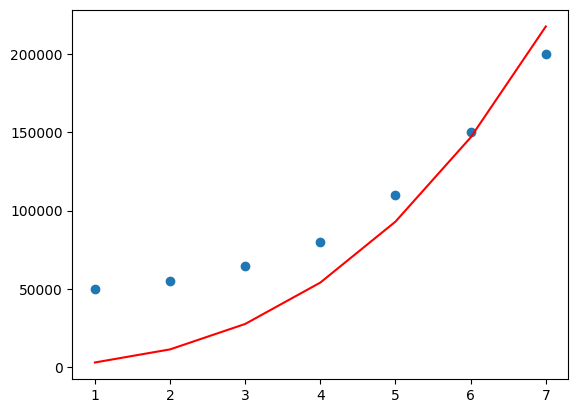

In [15]:
plt.scatter(X,y)
plt.plot(X , y_hatA , c="red")

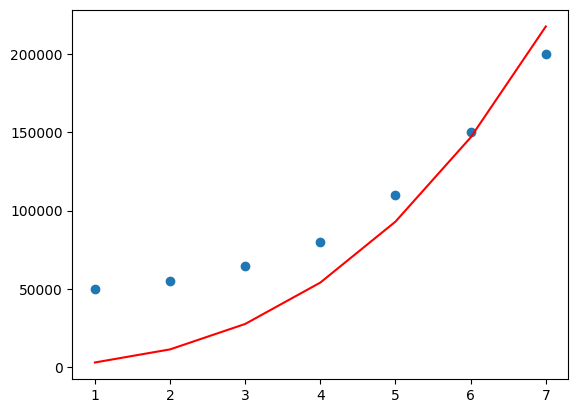

In [16]:
plt.scatter(X,y)
plt.plot(X , y_hatB , c="red")

# Bonus: Scaling

In [17]:
def _scale_x(x):
    return (x-x.min())/(x.max() - x.min())
def scale_X(X):
    X = np.array(X)
    if(X.ndim == 1):
        return _scale_x(X)
    for i in range(X.shape[1]):
        X[:,i] = _scale_x(X[:,i])
    return X

In [18]:
scaled_X_A = scale_X(X_A)

In [19]:
modelA.fit(scaled_X_A , y , alpha=0.1 , n_iter=200)

real value 50000.0, predicted value = 0.0, mse = 6482142857.142858
real value 50000.0, predicted value = 10142.857142857145, mse = 4583520166.124284
real value 50000.0, predicted value = 18543.465196823385, mse = 3254785918.7536645
real value 50000.0, predicted value = 25489.286195499448, mse = 2324392764.160689
real value 50000.0, predicted value = 31220.59406915745, mse = 1672452707.1898367
real value 50000.0, predicted value = 35938.21571892374, mse = 1215179689.6081512
real value 50000.0, predicted value = 39810.00229583354, mse = 894017384.5037531
real value 50000.0, predicted value = 42976.23897140786, mse = 668041221.3932629
real value 50000.0, predicted value = 45554.16732083707, mse = 508648586.1856076
real value 50000.0, predicted value = 47641.765878516744, mse = 395848097.33488
real value 50000.0, predicted value = 49320.9105493001, mse = 315666386.0943559
real value 50000.0, predicted value = 50660.01659892741, mse = 258335837.37150684
real value 50000.0, predicted value =

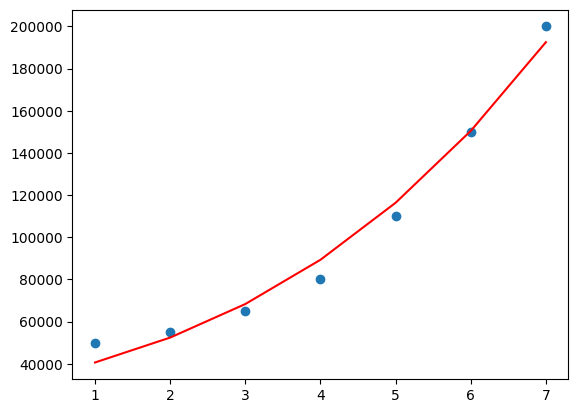

In [20]:
y_hatA = modelA.predict(scaled_X_A)
plt.scatter(X,y)
plt.plot(X , y_hatA , c="red")

## !Note The accuracy is higher however the number of iterations is the same